<a href="https://colab.research.google.com/github/sanjaykumar-nb/Imageclassifier_transferlearning/blob/main/transferresnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

epoch,train_loss,valid_loss,accuracy,time
0,4.597499,1.551566,0.609259,08:47
1,2.864261,0.860976,0.765741,08:43


Better model found at epoch 0 with valid_loss value: 1.551566481590271.
Better model found at epoch 1 with valid_loss value: 0.8609758019447327.


epoch,train_loss,valid_loss,accuracy,time
0,1.919966,0.686326,0.812963,12:31
1,1.747460,0.631379,0.829630,12:37
2,1.664894,0.790620,0.798148,12:34
3,1.564108,0.634026,0.829630,12:47
4,1.459039,0.660798,0.821296,12:43


Better model found at epoch 0 with valid_loss value: 0.6863262057304382.
Better model found at epoch 1 with valid_loss value: 0.6313793063163757.
No improvement since epoch 1: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Predicted class: cat, Probability: 0.9830


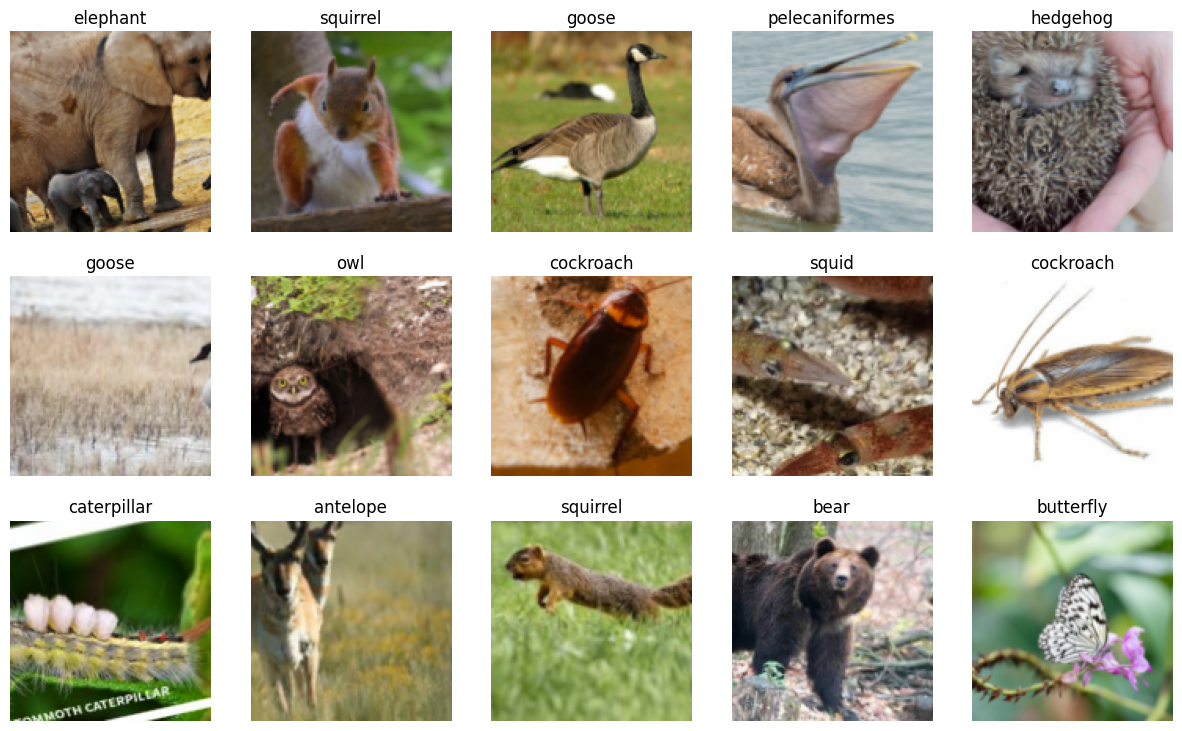

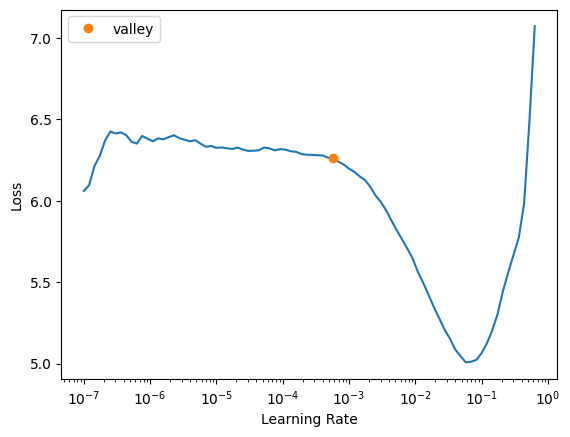

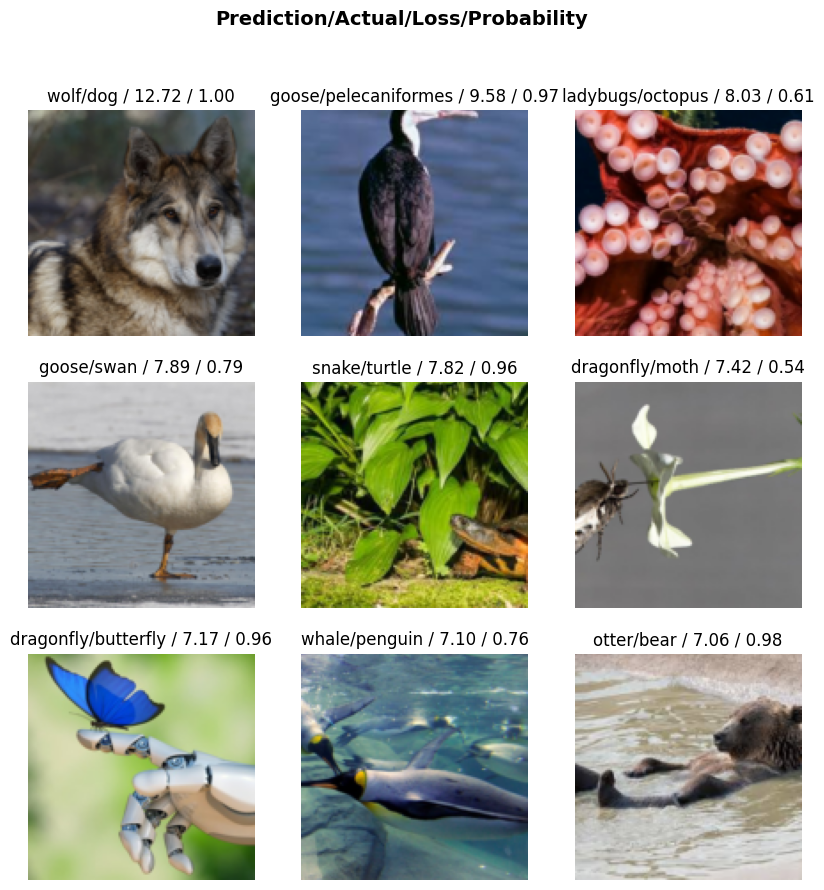

In [ ]:
import kagglehub
from fastai.vision.all import *

# 📥 Download datase
path ='/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals'

# 🔄 Define data augmentations
custom_transforms = aug_transforms(
    max_rotate=15,       # Reduce rotation to avoid over-distortion
    max_zoom=1.3,        # Lower zoom for better context retention
    p_affine=0.7,        # Affine transform probability
    p_lighting=0.7       # Slightly increase lighting changes
)

# 🔥 Use Progressive Resizing: Start small, then increase resolution
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),  # Start with smaller images
    batch_tfms=custom_transforms + [Normalize.from_stats(*imagenet_stats)]  # ✅ FIXED
).dataloaders(path, bs=64)  # Increase batch size for efficiency

# 📸 Preview dataset
dls.show_batch(max_n=15)

# 🏗 Load a better CNN model (ResNet34)
learn = vision_learner(dls, resnet34, metrics=accuracy, cbs=MixUp(0.2)).to_fp16()  # Mixed Precision for faster training

# 🔍 Find best learning rate
learn.lr_find()

# 🚀 Train with one-cycle policy & early stopping
learn.fine_tune(
    10,   # Reduce epochs for faster training
    base_lr=3e-3,
    freeze_epochs=2,  # Freeze early layers initially
    cbs=[
        EarlyStoppingCallback(monitor='valid_loss', patience=3),
        SaveModelCallback(monitor='valid_loss', fname='animal_classifier_resnet34')
    ]
)

# ✅ Load best model
learn.load('animal_classifier_resnet34')

# 🔎 Interpret results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(10,10))

learn.save('animal_classifier_resnet34')

# 📤 Export trained model
learn.export('animal_classifier_resnet.pkl')


In [ ]:
learn.save('animal_classifier_resnet34_final')

Path('models/animal_classifier_resnet34_final.pth')

In [ ]:
from PIL import Image

# Load a test image (provide the correct path)
img_path = 'ccc.jpg'
img = PILImage.create(img_path)

# Predict the class
pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted Class: {pred_class}")
print(f"Confidence: {probs[pred_idx]:.4f}")


Predicted Class: cat
Confidence: 0.9830


In [ ]:
accuracy_score = learn.validate()[1]  # The second value is the accuracy
print(f"Model Accuracy: {accuracy_score:.4f}")

Model Accuracy: 0.8296


Predicted Class: deer
Confidence: 0.3211


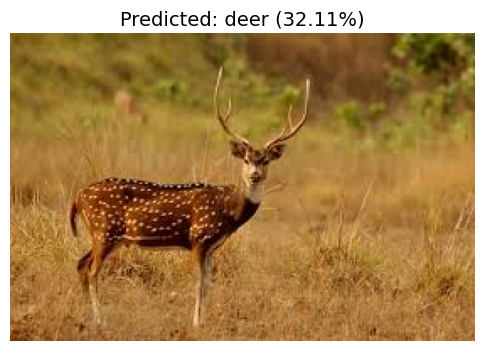

In [ ]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from PIL import Image

# 📥 Define dataset path (used during training)
path = '/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals'

# 🏗 Recreate the DataLoaders (needed for model reconstruction)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms() + [Normalize.from_stats(*imagenet_stats)]
).dataloaders(path, bs=64)

# 🏗 Rebuild the model architecture (must match training)
learn = vision_learner(dls, resnet34, metrics=accuracy)

# 🔄 Load the trained weights from .pth file
learn.load('/content/models/animal_classifier_resnet34')  # Do NOT include .pth extension

# 🖼️ Load an image for prediction
img_path = 'deer.jpeg'  # Replace with your image path
img = PILImage.create(img_path)

# 🔍 Predict the class
pred_class, pred_idx, probs = learn.predict(img)

# 🖼️ Display results
print(f"Predicted Class: {pred_class}")
print(f"Confidence: {probs[pred_idx]:.4f}")

# 📸 Show the image with prediction
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {pred_class} ({probs[pred_idx]:.2%})', fontsize=14)
plt.show()
